# 380CT THEORETICAL ASPECTS OF COMPUTER SCIENCE

## Travelling Salesman Problem

* Brief Background 
* Notation And Definitions
* Methodology 
* Theory of Greedy Algorithm and Genetic Algortihm
* Practice of Greedy Algorithm and Genetic Algorithm
* Conclusion
* Reflection
* References

#### Author: Fudayl Talha Altınel


## Brief Background

Travelling Salesman problem has been a great problem for years. For the given number of cities and distances between each of them, we try to find shortest path that visits each city and returns back to the starting point. Famously travelling salesman problem is solved with exhaustive search algorithm in order to get the most accurate result. But our lives has been changed too much since theory of computational complexity came up. Then we started to realize complexity of exhaustive search algorithm was O(n!) and it was quiet inefficient to calculate larger problems due to it's high complexity. In the result it was taking too much time for larger problems and we had to come up with different algorithms which has lower complexity.


## Notation And Definitions

* Complete: the graph is undirected, has no self-loops, and each node is connected to all the other vertices.
* Weighted: the edges have a weight (a positive integer).
* Cycle: a path that visits every vertex once, and goes back to the start point.
* Total cost of the cycle: sum of the edge weights of the cycle.


## Methodology

Since our problem was focused on complete weighted graph, we needed to create my cities-distances matrix which also had to show distances between them. And for our cities matrix sample, we knew that distance between A-B and B-A had to be same. So we generated it by that way. For greedy algorithm we have used starting point and cities-distances matrix as parameters. Starting point 0 means city A, 1 means city B, 2 means city C etc. For genetic algorithm we have used starting point, population size, elite size, mutation rate, generations number and cities-distances matrix as parameters.In experiments of this project we have compared times by only using different city numbers on both algorihms. We have also compared accuracy of our results by using numerous different samples with the same city numbers and taking the average of those to show better results on both algorithms.


In [1]:
import random # for fair randomness
import pandas as pd # for visualization
from math import inf as oo # for greedy
import time # for graphs
import matplotlib.pyplot as plt # B for graphs
from itertools import permutations # for greedy
import operator # for genetic
import numpy as np # for genetic 

In [2]:
def print_cities_and_distances(cities, distances):
    """
    This is for printing our distances matrix
    """
    df = pd.DataFrame(data=distances, columns=cities, index=cities)
    print(df)
    
def get_cities(cities_count):
    """
    This is for generating cities in 1D array
    """
    return [c for c in range(cities_count)]

def create_random_cities_and_distances(n):
    """
    This is for generating our distances matrix as 2D array
    """
    cities_count = n
    cities = [c for c in range(cities_count)]
    distances = [[] for _ in range(cities_count)]

    for i in range(cities_count):
        for j in range(cities_count):
            if i == j:
                distance = 0
            elif i > j:
                distance = distances[j][i]
            else:
                distance = random.randint(1, 100)
            distances[i].append(distance)
    # print_cities_and_distances(cities, distances)
    return distances

create_random_cities_and_distances(5)

[[0, 92, 22, 15, 3],
 [92, 0, 6, 85, 91],
 [22, 6, 0, 7, 25],
 [15, 85, 7, 0, 27],
 [3, 91, 25, 27, 0]]

## Theory of Greedy Algorithm

Greedy algorithm is a basically an algorithm that prefers the points which has shortest distance between the current point and the next point. But overlappings are not allowed so it needs to be complete, cycle and direct itself by tracking which points it visited. This was the main idea of the greedy algorithm.

### Formulation of Idea

* We initiate our starting point and empty visited route list.Then we set our shortest distance to infinity and set all cities as available direction paths
* For all outer city iterations we need to calculate the possible distances and directions. For that purpose we check available points for our current point which is our starting point and if it is our current point we skip it and if it is not we check for the shortest distance if it is less than our last shortest distance value we keep that point as picked point.
* Before we go into next outer city iteration we add that distance to our sum and add picked point into visited route. We also remove the current point from available path and set our current point as picked point. Lastly we set our shortest distance to infinity
* After the first city iteration, we repeat the same cycle for all city iterations,then we return the sum and visited route in the end

1. $cities\gets [0...(n-1)]$
2. $startPoint\gets 0$
3. $currentPoint\gets startPoint$
4. $shortestDistance\gets \infty$
5. $route\gets \emptyset$
6. $availablePath\gets cities$
7. $sum\gets 0$
8. 
9. **for** length of $cities$ do
10. $\quad$ **for** all possible cities $c$ in $cities$ **do**
11. $\qquad$ **if** $availablePath$[c] is equal to $currentPoint$ **then**
12. $\qquad$ $\quad$ **continue** for loop
13. $\qquad$ **else if** $shortestDistance$ bigger than distance between $currentPoint$ and $availablePath$[c] **then**
14. $\qquad$ $\quad$ $pickedPoint \gets$ $availablePath$[c]
15. $\qquad$ **endif**
16. $\qquad$ $shortestDistance\gets$ min of (($shortestDistance$) and (distance between $currentPoint$ and $avaiablePath$[c]))
17. $\quad$ **end for**
18. $\quad$ **if** $availablePath$ is equal to $\emptyset$ **then**
19. $\qquad$ $sum \gets$ $sum$ + distance between our $avaiablePath$[c] and $pickedPoint$
20. $\qquad$ **print** $sum$ and $route$
21. $\quad$ **else**
22. $\qquad$ $sum \gets$ $sum$ + distance between our $avaiablePath$[c] and $pickedPoint$
23. $\qquad$ $route \gets$ $pickedpoint$
24. $\qquad$ $availablePath$ removes $currentPoint$ from set
25. $\qquad$ $currentPoint \gets$ $pickedPoint$
26. $\qquad$ $shortestDistance \gets \infty$
27. $\quad$ **endif**
28. **end for**
29. 
30. **return** $sum$ and $route$


There are $n$ many cities. On line 9 we run our for loop $n$ times. On line 10 we run our for loop for each possible cities which is again $n$ many times.So as a result our greedy search algorithm costs $$O(n^2)$$


In [3]:
def do_greedy_search(starting_point, distances_matrix):
    cities = get_cities(len(distances_matrix))
    start_point = starting_point  # 0 means A, 1 means B, 2 means C
    if start_point >= len(cities) or start_point < 0:
        start_point = 0
    current_point = start_point
    shortest_distance = oo
    visited_route = list()
    visited_route.append(current_point)
    available_path = cities  # [0,1,2,3] for 4 cities
    sum = 0

    for city in range(len(cities)):
        for i in range(len(cities)):
            if available_path[i] == current_point:
                continue
            elif shortest_distance > distances_matrix[current_point][available_path[i]]:
                picked_point = available_path[i]
            shortest_distance = min(shortest_distance, distances_matrix[current_point][available_path[i]])
        if len(available_path) <= 1:
            sum += distances_matrix[current_point][start_point]
            # print("Route: " + str(visited_route))
            # print("Distance: " + str(sum))
        else:
            sum += distances_matrix[current_point][picked_point]
            visited_route.append(picked_point)
            available_path.remove(current_point)
            current_point = picked_point
            shortest_distance = oo
    return sum, visited_route

do_greedy_search(0,create_random_cities_and_distances(10))

(182, [0, 6, 2, 4, 3, 8, 1, 7, 5, 9])

## Theory of Genetic Algortihm

Genetic algorithm is basically an algorithm that improves itself overtime through different stages in a generation. These stages simply summarized as creating population, doing the selection, breeding the remaining population and applying the mutation lastly. Random generator is heavily used through all of those stages defined before this sentence. Population is mostly ranked according to their fitness scores most of the time during all those stages to keep track of the fittest(shortest) individual route. After repeating those steps for each generation we get the shortest alternatives in our results.This was the main idea of the genetic algorithm

### Formulation of Idea

* We create random routes by length of cities and population size with starting points and add them into population. There may be duplicates during this process but it is usually fine
* We define a fitness score for a route which is actually 1 over the total distance of the route
* We define a ranked population which the sorted version of the population according to their fitness score
* We get ranked population and elite size as parameters in selection.Elites already are guarenteed to win selection so we add them into our result list. For the rest of them we construct a cumulative sum and a cumulative percentage, we pick a random percentage between 0 and 100 and pick the closest smaller index and add it from population ranked to the result
* According to fitness results we get the routes from population in mating pool.
* We define breeding which is basically taking parts from first parent and second parent. During the breeding process we pick a starting point and ending point(depends on a random number) which specifies the indexed array from first parent and fill the missing cities from second parent. In the result we return the route
* We define the breeding for population which does perform breeding between the fittest one(first index of ranked population) and the worst one(last index of ranked population) then the second fittest one and the second worst one...for the last one the worst one and the fittest one it goes on until everyone breeded twice in our population.And elites still get into new generation as children but they also breed
* We define the mutation which is basically a small chance to swap the points(genes) in routes(individuals) and apply it to entire population
* After these steps are taken we repeat this same cycle(selection,breed,mutate) to get better generations as results

1. $population\gets \emptyset$
1. 
1. **for** $populationSize$ times **do**
1. $\quad$ $temp \gets$ random shuffled cities array which has starting point as first index number
1. $\quad$ $population$ adds $temp$ to itself
1. **end for**
1. 
1. **return $population$**

There are $p$ many population size and $n$ many cities. According to for loop on line 3 and line 4, creating initial population costs $$O(n.p)$$

In [4]:
def create_initial_population(starting_point, cities, population_size):
    """
    This creates random routes as an array and stores into population.
    There can be duplicates. First index is always starting point
    """
    start_point = starting_point  # 0 means A, 1 means B, 2 means C etc.
    if start_point >= len(cities) or start_point < 0:
        start_point = 0
    population = []
    for i in range(population_size):
        temp = random.sample(cities, len(cities))
        if start_point in temp:
            temp.remove(start_point)
        temp[:0] = [start_point]
        population.append(temp)
    return population

1. $distance \gets 0$
1. 
1. **for** (all city numbers - 1) times **do**
1. $\quad$ $distance \gets$ $distance$ + the distance between current city and the next city
1. **end for**
1. $distance \gets$ $distance$ + gets the distance between last city and start city
1. 
1. **return** 1/distance

There are n many cities. According to for loop on line 2, calculating fitness score costs $$O(n-1) = O(n)$$

In [5]:
def get_fitness_score(route, distances_matrix):
    """
    This gets the fitness score of the route
    Longer the route lower the score becomes
    """
    distance = 0
    for i in range(len(route)-1):
        distance += distances_matrix[route[i]][route[i+1]]
    distance += distances_matrix[route[len(route)-1]][route[0]]
    return 1 / float(distance)

1. $fitnessResults \gets \emptyset$
1. **for** $populationSize$ times **do**
1. $\quad$ $fitnessResults \gets$ fitness scores of each individual in population
1. **end for**
1. 
1. $fitnessResults$ gets sorted with merge sort
1. **return** $fitnessResults$

There are $p$ many population size. According to merge sort on line 6, creating initial ranking routes costs $$O(p.log p)$$

In [6]:
def rank_routes(population, distances_matrix):
    """
    This function creates hash map as key,value pairs and
    Returns sorted according to fitness score like [(1, 0.0792), (3, 0.0760), (2, 0.0742), (4, 0.0739)]
    """
    fitness_results = {}
    for i in range(len(population)):
        fitness_results[i] = get_fitness_score(population[i], distances_matrix)
    return sorted(fitness_results.items(), key=operator.itemgetter(1), reverse=True)

1. $selectionResults \gets \emptyset$
1. 
1. **for** $eliteSize$ times **do**
1. $\quad$ $selectionResults$ adds first individuals of $populationRanked$
1. **end for**
1. 
1. **for** (difference between $populationSize$ and $eliteSize$) times **do**
1. $\quad$ $pick \gets$ random floating point number between 0 and 100
1. $\quad$ **for** $populationSize$ times **do**
1. $\qquad$ **if** $pick$ bigger than cumulative percentage of that individual **then**
1. $\qquad$ $\quad$ $selectionsResults$ adds that individual to itself from $populationRanked$
1. $\qquad$ $\quad$ **break** for loop
1. $\quad$ **end for**
1. **end for**
1. 
1. **return** $selectionResults$

There are $p$ many population size and $p/5$ many elite size.For loop on line 7, we iterate our loop $4p/5$ times. Assuming pick gets the worst scenario we will have to go over all population ranked individuals without breaking. Then this will cost us $p$ times on line 9. So selection in worst case costs $$O(4/5.p^2) = O(p^2)$$

In [7]:
def selection(population_ranked, elite_size):
    """
    This function guarantees first elites to be included in output array according to fitness points
    Then for the remaining part it picks random percentage and compares it with the cumulative percentage
    If that percentage is higher it adds it and goes for the next iteration until it feels population back to its size
    Lower the pick more healthy population will be generated but variation will get less which is something we dont like
    """
    selection_results = []
    df = pd.DataFrame(np.array(population_ranked), columns=["Index", "Fitness"])
    df["cum_sum"] = df.Fitness.cumsum()
    df["cum_perc"] = 100 * df.cum_sum/df.Fitness.sum()
    for i in range(elite_size):
        selection_results.append(population_ranked[i][0])
    for i in range(len(population_ranked) - elite_size):
        pick = 100 * random.random()
        for i in range(len(population_ranked)):
            if pick <= df.iat[i, 3]:
                selection_results.append(population_ranked[i][0])
                break
    return selection_results

1. $matingPool \gets \emptyset$
1. 
1. **for** size of selectionResults times **do**
1. $\quad$ $index \gets$ index of individual from selectionResults
1. $\quad$ $matingPool$ adds the individual from population
1. **end for**
1. 
1. return $matingPool$

Since there is $p$ many population and selectionResults size always is equal to population size.Getting mating pool costs $$O(p)$$

In [8]:
def get_mating_pool(population, selection_results):
    """
    This function gets our population in array with respect to selection results
    """
    mating_pool = []
    for i in range(len(selection_results)):
        index = selection_results[i]
        mating_pool.append(population[index])
    return mating_pool

1. $child \gets \emptyset$
1. $childPart1 \gets \emptyset$
1. $childPart2 \gets \emptyset$
1. $genA \gets $ random integer between 0 and parent city's length -2
1. $genB \gets $ random integer between 0 and parent city's length -2
1. $startingPointOfGene \gets 0$
1. $endingPointOfGene \gets $ **floorOf**((genA + genB) / 2) + 1
1. 
1. **if** endingPointOfGene is equal to parent city's length **then**
1. $\quad$ $endingPointOfGene \gets$ $endingPointOfGene$ - 1
1. **end if**
1. **for** i in [$startingPointOfGene$...$endingPointOfGene$-1] **do**
1. $\quad$ $childPart1$ adds i of firstParent to itself
1. **end for**
1. **for** i in secondParent **do**
1. $\quad$ **if** i not in $childParent1$ **then**
1. $\qquad$ $childPart2$ adds i of secondParent to itself
1. $\quad$ **end if**
1. **end for**
1. $child \gets$ childPart1 + childPart2
1. 
1. **return** child

There are $n$ many cities. Parent1 and Parent 2 will have n number of elements inside them, On line 12 or 15 we see that the iteration count is $n-1$ in worst cases. Breeding costs $$O(n-1) = O(n)$$

In [9]:
def breed(parent1, parent2):
    """
    This functions constructs a child from parent1 and parent2.ChildPart1 comes from parent1 and
    ChildPart2 comes from parent2.Idea is we always pick [0 to random value] interval from parent1 and
    Complete missing parts from parent1 with order
    """
    child = []
    childPart1 = []
    childPart2 = []

    geneA = random.randint(0,len(parent1)-1)
    geneB = random.randint(0,len(parent1)-1)
    startingPointOfGene = 0  # set to 0 because we wanna keep our starting point in child
    endingPointOfGene = (geneA+geneB) // 2 + 1
    if endingPointOfGene == len(parent1):
        endingPointOfGene -= 1

    for i in range(startingPointOfGene, endingPointOfGene):
        childPart1.append(parent1[i])

    childPart2 = [i for i in parent2 if i not in childPart1]

    child = childPart1 + childPart2
    return child

1. $children \gets \emptyset$
1. $length \gets len(matingPool) - eliteSize$
1. $pool \gets$ random shuffled routes as length of $matingPool$
1. 
1. **for** i in [0...$eliteSize-1$] **do**
1. $\quad$ children adds i index of $matingPool$ to itself
1. **end for**
1. **for** i in [0...$lentgth -1$] **do**
1. $\quad$ $child \gets$ breed of((i) index of pool and (len(matingPool)-i-1) index of pool)
1. $\quad$ $children$ adds $child$ to itself
1. **end for**
1. 
1. **return** $children$

There are $p$ many population. And eliteSize is $p/5$. On line 8, we see that iteration goes 4p/5 times. Breeding population costs $$O(4p/5) = O(p)$$

In [10]:
def breed_population(mating_pool, elite_size):
    """
    Elites directly become the children since they don't die for generations.Pool is obtained by random samples
    Of mating pool.In mating pool one couple can have more than 1 kids but their kids can be different than the siblings
    In odd number of populations a person can have a kid by itself and the kid will be exactly itself.Make sure we dont
    Have odd population numbers for more variety
    """
    children = []
    length = len(mating_pool) - elite_size
    pool = random.sample(mating_pool, len(mating_pool))

    for i in range(elite_size):
        children.append(mating_pool[i])

    for i in range(length):
        child = breed(pool[i], pool[len(mating_pool)-i-1])
        children.append(child)
    return children

1. **for** $sd$ in [1...$len(individual)-1$] **do**
1. $\quad$ **if** random floating number between 0 and 1 less than $mutationRate$ **then**
1. $\qquad$ $sw \gets$ random integer between 1 and $len(individual)-1$.
1. $\qquad$ $city1 \gets$ $sd$ index of $individual$ 
1. $\qquad$ $city2 \gets$ $sw$ index of $individual$
1. $\qquad$ $sd$ index of $individual$ $\gets$ $city1$
1. $\qquad$ $sw$ index of $individual$ $\gets$ $city2$
1. $\quad$ **end if**
1. **end for**
1. 
1. **return** $individual$

Individuals have $n$ many cities as a route in them. On line 1, we do the iteration as $n-1$ times. So mutating costs $$O(n-1) = O(n)$$

In [11]:
def mutate(individual, mutation_rate):
    """
    Mutation is actually basic swap operation which depends on its rate for each iteration
    """
    for swapped in range(1, len(individual)):
        if random.random() < mutation_rate:
            swapWith = random.randint(1, len(individual)-1)
            city1 = individual[swapped]
            city2 = individual[swapWith]
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

1. $populationMutated \gets \emptyset$
1. 
1. **for** i in [0...$len(population)-1$] times **do**
1. $\quad$ $individual \gets$ mutate of(i index of population) with $mutationRate$
1. $\quad$ $populationMutated$ adds $individual$ to itself
1. **end for**
1. 
1. **return** $populationMutated$

There are $p$ many population. On line 3, we see $p$ many times iteration. So mutating population costs $$O(p)$$

In [12]:
def mutate_population(population, mutation_rate):
    """
    Tries to apply mutation to all population
    """
    population_mutated = []

    for i in range(len(population)):
        individual = mutate(population[i], mutation_rate)
        population_mutated.append(individual)
    return population_mutated

1. $populationRanked \gets$ ranking()
1. $selectionResults \gets$ selection()
1. $matingPool \gets$ gettingPool()
1. $children \gets$ breedingPopulation()
1. $nextGeneration \gets$ mutatingPopulation()
1. 
1. **return** $nextGeneration$

There are $p$ many population. On line 1, we have ranking routes which costs $O(p.log p)$.On line 2, we have selection which costs $O(p^2)$. On line 3, we have getting pool which costs $O(p)$. On line 4 and 5, we have breeding population and mutationg population which both cost $O(p^2)$. Generating new generation costs us $$O(p^2)$$

In [13]:
def generate_new_generation(current_generation, elite_size, mutation_rate, distances_matrix):
    """
    Generates a new population from the 1 generation older population
    """
    population_ranked = rank_routes(current_generation, distances_matrix)
    selection_results = selection(population_ranked, elite_size)
    mating_pool = get_mating_pool(current_generation, selection_results)
    children = breed_population(mating_pool, elite_size)
    next_generation = mutate_population(children, mutation_rate)

    return next_generation

1. $population \gets$ create a initial population with population size
1. **print** initial distance
1. 
1. **for** $generations$ times **do**
1. $\quad$ $population \gets$ generate a new generation with elite size and mutation rate
1. $\quad$ **print** current distance
1. **end for**
1.
1. **return** best distance and route

There are $p$ many population. On line 1, creating a population costs $O(n.p)$. On line 4, we know that generations is a constant number as 500 so we know it's complexity is $O(500)$. On line 5, generating a generation costs $O(p^2)$. As a results our genetic search algorithm costs without constant population size $$O(500.p^2)=O(p^2)$$ if we keep population size as a constant, the complexity of our genetic algorithm will be $$O(n)$$

In [23]:
def do_genetic_search(starting_point, population_size, elite_size, mutation_rate, generations, distances_matrix):
    population = create_initial_population(starting_point, get_cities(len(distances_matrix)) ,population_size)
    # print("Initial distance: " + str(1/rank_routes(population, distances_matrix)[0][1]))

    for i in range(generations):
        population = generate_new_generation(population, elite_size, mutation_rate, distances_matrix)
        # print("Distance: " + str(1 / rank_routes(population, distances_matrix)[0][1]))

    # print("Final distance: " + str(1/rank_routes(population, distances_matrix)[0][1]))
    index = rank_routes(population, distances_matrix)[0][0]
    route = population[index]
    # print("Your ideal route is: " + str(route))
    return 1/rank_routes(population, distances_matrix)[0][1], route

do_genetic_search(0,100,20,0.01,500,create_random_cities_and_distances(30))

(354.0,
 [0,
  2,
  22,
  24,
  20,
  19,
  18,
  14,
  15,
  13,
  5,
  12,
  29,
  28,
  7,
  21,
  27,
  26,
  6,
  1,
  17,
  16,
  8,
  25,
  23,
  10,
  9,
  11,
  4,
  3])

## Practice of Greedy Algorithm and Genetic Algorithm

* Time Experiment
* Accuracy Experiment

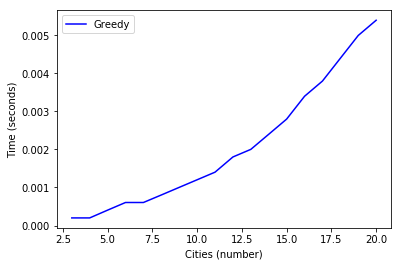

In [21]:
gre_xCoords = []
gre_yCoords = []
count = 3
start_gre,end_gre,total_interval_gre,avg_total_interval_gre = 0,0,0,0 

while(count<= 20):
    for i in range(5):
        start_gre = time.time()
        do_greedy_search(0,create_random_cities_and_distances(count))
        end_gre = time.time()
        total_interval_gre += end_gre - start_gre
    avg_total_interval_gre = total_interval_gre / 5
    gre_xCoords.append(count);
    gre_yCoords.append(avg_total_interval_gre)
    count += 1
    
plt.plot(gre_xCoords,gre_yCoords, "-b", label = "Greedy")
plt.xlabel("Cities (number)")
plt.ylabel("Time (seconds)")
plt.legend(loc="upper left")
plt.show()

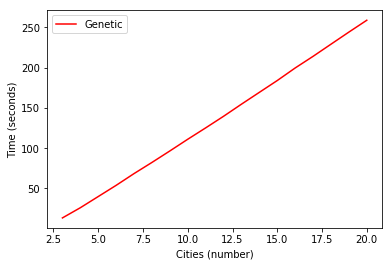

In [26]:
gen_xCoords = []
gen_yCoords = []
count = 3
start_gen,end_gen,total_interval_gen,avg_total_interval_gen = 0,0,0,0 

while(count<= 20):
    for i in range(5):
        start_gen = time.time()
        do_genetic_search(0,100,20,0.01,500,create_random_cities_and_distances(count))
        end_gen = time.time()
        total_interval_gen += end_gen - start_gen
    avg_total_interval_gen = total_interval_gen / 5 
    gen_xCoords.append(count);
    gen_yCoords.append(avg_total_interval_gen)
    count += 1
    
plt.plot(gen_xCoords,gen_yCoords, "-r", label = "Genetic")
plt.xlabel("Cities (number)")
plt.ylabel("Time (seconds)")
plt.legend(loc="upper left")
plt.show()
        

Number of Cities		Greedy Accuracy			Genetic Accuracy
3 				 100.0 				 100.0
4 				 88.31 				 100.0
5 				 82.86 				 100.0
6 				 96.95 				 100.0
7 				 88.71 				 100.0
8 				 75.49 				 98.33
9 				 83.97 				 100.0
10 				 77.59 				 94.05
11 				 68.42 				 94.82
12 				 82.11 				 85.89


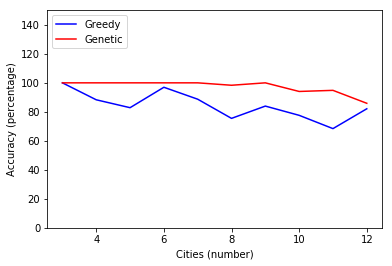

In [48]:
# Exhaustive Search Methods Are Provided By Instructor
from itertools import permutations

def get_matrix(n):
    cities_distance = [[] for _ in range(n)]
    
    for x in range(n):
        for y in range(n):
            if(x == y):
                distance = 0
            elif(x>y):
                distance = cities_distance[y][x];
            else:
                distance = random.randint(1,10)
            cities_distance[x].append(distance)
    
    return cities_distance

def cost(mx, path):
    c = 0
    for a,b in zip([0]+path, path+[0]):
        c += mx[a][b]
    return c
    
def solve_tsp(mx):
    n = len(mx)
    city_names = list(range(n))
    
    best_cost = oo
    best_path = []
    for path in permutations(city_names[1:]):
        path=list(path)
        c = cost(mx, path)
        if c< best_cost:
            best_cost = c
            best_path = [0]+path+[0]
    return (best_path, best_cost)

# Accuracy Test of Greedy and Genetic
count = 3
gre_xCoords = []
gre_yCoords = []
gen_xCoords = []
gen_yCoords = []
total_greed_acc = total_genetic_acc = total_gre = total_gen = 0

print("Number of Cities\t\tGreedy Accuracy\t\t\tGenetic Accuracy")

while(count <= 12):

    total_greed_acc = 0
    
    total_gre = 0
    
    total_gen = 0
    
    total_genetic_acc = 0
    
    for i in range(5):       
        # Exhaustive Cost
        mx = get_matrix(count)
        
        pt, cst = solve_tsp(mx)

        # Greedy Cost 
        greed_cost, greed_route = do_greedy_search(0,mx)

        # Genetic Cost
        genetic_cost, genetic_route = do_genetic_search(0,100,20,0.01,100,mx)

        gre_acc = 100 - (abs(greed_cost-cst) / cst * 100)
        #gre_acc = (greed_cost/cst) * 100
        total_gre += gre_acc
        
        gen_acc = 100 - (abs(genetic_cost-cst) / cst * 100)
        #gen_acc = (genetic_cost/cst) * 100
        total_gen += gen_acc
        
    total_greed_acc = total_gre / 5
    total_genetic_acc = total_gen / 5
    print(count,"\t\t\t\t",round(total_greed_acc,2),"\t\t\t\t", round(total_genetic_acc,2))
    
    gre_xCoords.append(count)
    gre_yCoords.append(total_greed_acc)
    gen_xCoords.append(count)
    gen_yCoords.append(total_genetic_acc)
    
    count+=1

plt.ylim(0,150)
plt.xlabel("Cities (number)")
plt.ylabel("Accuracy (percentage)")
plt.plot(gre_xCoords, gre_yCoords, 'b-',label = "Greedy")
plt.plot(gen_xCoords, gen_yCoords, 'r-',label = "Genetic")
plt.legend(loc="upper left")
plt.show()

## Conclusion

## Reflection

I have developed the genetic algorithm by reading lots of documents about the idea and the implementation aspects. The project taught me better organization skills while i was working with my team. Most importantly project also taught me more different aspects of the genetic algorithm such as different selection and mutation method algorithms. I also have realized the genetic algorithm could also be a solution for different type of problems in reinforcement learning or deep learning which are more relevant to artificial intelligence. In future i might be able to apply my genetic algortihm thinking in those areas that i have mentioned. Lastly [STATE TWO THINGS THAT COULD HAVE BEEN IMPROVED AND HOW]

## References

* Evolution of a salesman: A complete genetic algorithm tutorial for Python by Eric Stoltz
<br /> https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35
* 